In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.cluster import KMeans

In [116]:
ESR = pd.read_csv("data/Epileptic_Seizure_Recognition.csv")
ESR

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


In [56]:
"""5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed

3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area

2 - They recorder the EEG from the area where the tumor was located

1 - Recording of seizure activity"""

'5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open\n\n4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed\n\n3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area\n\n2 - They recorder the EEG from the area where the tumor was located\n\n1 - Recording of seizure activity'

In [ ]:
array = ESR.iloc[:, 1:179].to_numpy()

# find max value and index
maxi = np.max(array)
maxi_index = np.unravel_index(np.argmax(array), array.shape)

# find min value and index
mini = np.min(array)
mini_index = np.unravel_index(np.argmin(array), array.shape)

array

In [118]:
# normalize data
array = (array + abs(mini)) / (maxi + abs(mini))
array

array([[0.51373347, 0.52772126, 0.53763988, ..., 0.44989827, 0.45829095,
        0.4664293 ],
       [0.57756867, 0.57655137, 0.56993896, ..., 0.51856562, 0.51576806,
        0.51220753],
       [0.47126144, 0.46948118, 0.46744659, ..., 0.47049847, 0.47049847,
        0.47024415],
       ...,
       [0.48296033, 0.48092574, 0.47609359, ..., 0.47889115, 0.47914547,
        0.47736521],
       [0.46922686, 0.47304171, 0.47711089, ..., 0.49669379, 0.49440488,
        0.49338759],
       [0.48677518, 0.48982706, 0.49389624, ..., 0.47889115, 0.47990844,
        0.48448627]])

In [121]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(array)
pred_labels = kmeans.labels_
pred_labels += 1
pred_labels

array([1, 5, 1, ..., 5, 1, 5], dtype=int32)

In [122]:
og_labels = ESR.y.to_numpy()
og_labels

array([4, 1, 5, ..., 5, 3, 4])

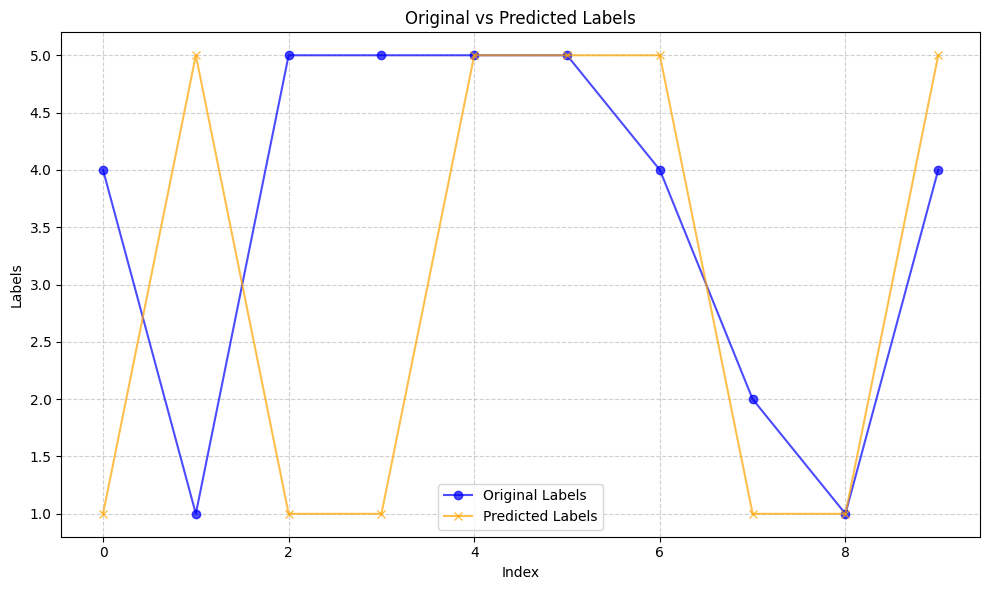

In [123]:
n = 10
indices = [i for i in range(n)]

plt.figure(figsize=(10, 6))
plt.plot(indices, og_labels.tolist()[:n], label="Original Labels", color="blue", marker='o', linestyle='-', alpha=0.7)
plt.plot(indices, pred_labels.tolist()[:n], label="Predicted Labels", color="orange", marker='x', linestyle='-', alpha=0.7)

# Adding labels and legend
plt.title("Original vs Predicted Labels")
plt.xlabel("Index")
plt.ylabel("Labels")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the plot
plt.show()